CSV file 'sales_data.csv' loaded successfully!

First 5 rows of the DataFrame:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

          ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0    2/24/2003 0:00  Shipped       1         2     2003  ...   
1  05-07-2003 00:00  Shipped       2         5     2003  ...   
2  07-01-2003 00:00  Shipped       3         7     2003  ...   
3    8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10-10-2003 00:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue

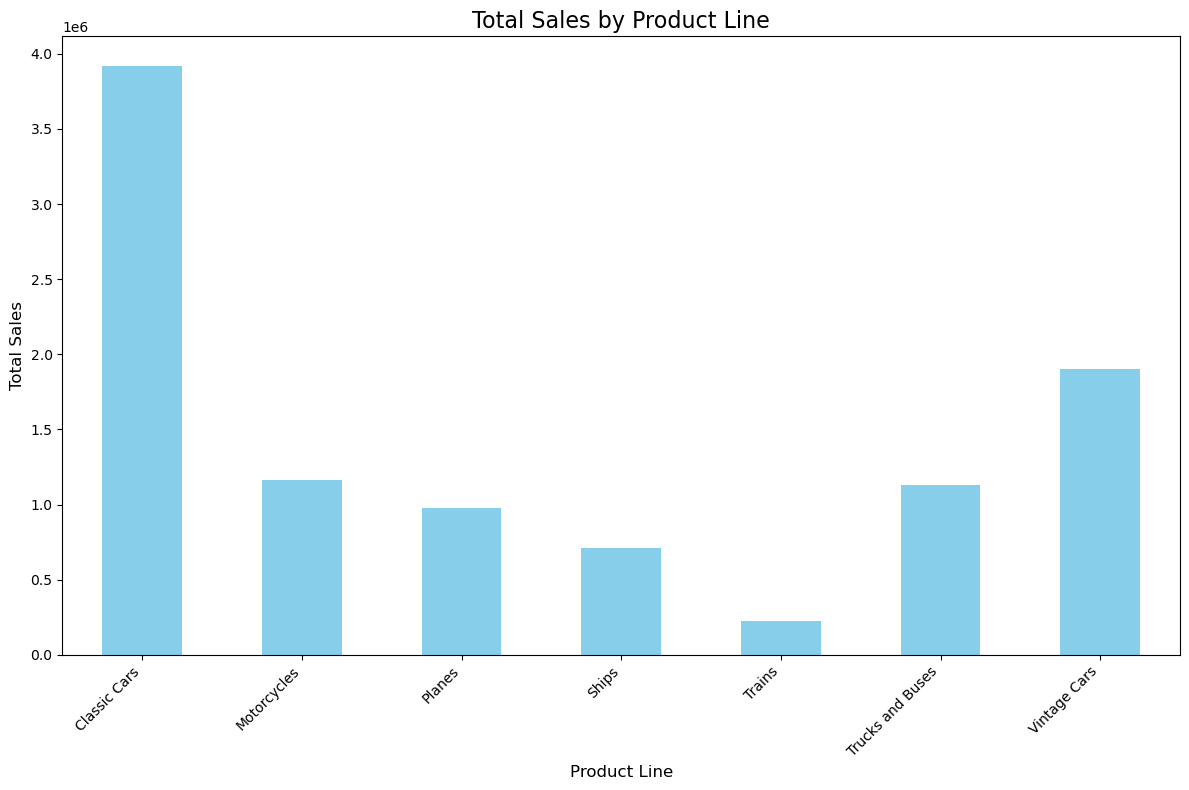

In [3]:
# Import the pandas library, which is essential for data manipulation and analysis.
import pandas as pd
import matplotlib.pyplot as plt
import os # Import the os module for path manipulation

# --- Step 1: Load the CSV file into a Pandas DataFrame ---
# A DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous
# tabular data structure with labeled axes (rows and columns).
# We'll use a try-except block to handle potential errors, such as the file not being found.
try:
    # Python interprets a backslash (\) as an escape character.
    # We will use os.path.join() to create a platform-independent path.
    file_name = 'sales_data.csv'
    file_path = os.path.join(os.getcwd(), file_name)

    # The 'UnicodeDecodeError' occurs when the file's encoding does not match the default 'utf-8'.
    # We will explicitly specify a common alternative encoding, such as 'latin1'.
    df = pd.read_csv(file_path, encoding='latin1')

    print(f"CSV file '{file_name}' loaded successfully!")
except FileNotFoundError:
    print(f"Error: '{file_name}' not found. Please make sure the file is in the same directory.")
    # Exit the script if the file is not found.
    exit()

# --- Step 2: Display basic information about the DataFrame ---
# .head() displays the first 5 rows of the DataFrame, which is useful for a quick look at the data.
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# .shape returns a tuple representing the dimensionality of the DataFrame (rows, columns).
print("\nShape of the DataFrame (rows, columns):")
print(df.shape)

# --- Step 3: Perform data analysis using groupby() and sum() ---
# We will group the data by the 'PRODUCTLINE' column and calculate the sum of 'SALES' for each.
# This gives us the total sales for each product line.
# .groupby() is a powerful function that splits the data into groups based on some criteria.
# .sum() then calculates the sum for each group.
try:
    total_sales_by_productline = df.groupby('PRODUCTLINE')['SALES'].sum()
    print("\nTotal sales per product line:")
    print(total_sales_by_productline)
except KeyError as e:
    print(f"\nError: The DataFrame does not contain the required column: {e}.")
    print("Please check your CSV file and verify the column names.")
    exit()

# --- Step 4: Create a bar chart to visualize the results ---
# .plot(kind='bar') is a convenient method to quickly create a bar chart from a Series or DataFrame.
plt.figure(figsize=(12, 8)) # Set the figure size for better readability.
total_sales_by_productline.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Line', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability.
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping.
plt.show()

